# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [32]:
import tensorflow as tf
print(tf.__version__)

2.9.1


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [33]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [34]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

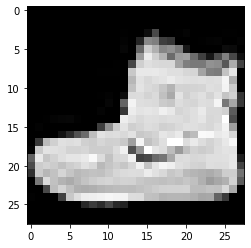

In [35]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [36]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [37]:
### Tu código para la red neuronal de la pregunta 1 aquí ###
nn = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
      tf.keras.layers.Dense(128, activation="sigmoid"),
      tf.keras.layers.Dense(10, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Es necesario preprocesar las etiquetas de salida para que sean reconocidas como categorías
training_labels = tf.keras.utils.to_categorical(training_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
nn.fit(training_images, training_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5908 - accuracy: 0.8045 - val_loss: 0.4681 - val_accuracy: 0.8330
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4096 - accuracy: 0.8543 - val_loss: 0.4223 - val_accuracy: 0.8467
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3705 - accuracy: 0.8673 - val_loss: 0.3957 - val_accuracy: 0.8596
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3479 - accuracy: 0.8750 - val_loss: 0.3861 - val_accuracy: 0.8598
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3302 - accuracy: 0.8804 - val_loss: 0.3749 - val_accuracy: 0.8661
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3145 - accuracy: 0.8866 - val_loss: 0.3585 - val_accuracy: 0.8709
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3003 - accuracy: 0.8916 - val_loss: 0.3501 - val_accuracy: 0.8756
Epoch 

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [39]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
score = nn.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3363288938999176
Test accuracy: 0.8791000247001648


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [40]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = nn.predict(test_images)
print(classifications)
print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[[2.59505646e-06 2.88184822e-07 4.99722910e-06 ... 6.50984943e-02 6.89559442e-04 9.02116001e-01]
 [7.58965558e-04 2.27694429e-07 9.74715233e-01 ... 8.64365788e-08 1.32002640e-06 2.30775541e-07]
 [6.94320042e-05 9.99818087e-01 8.12134476e-06 ... 7.55315952e-08 5.79101561e-06 2.11998308e-09]
 ...
 [2.34326092e-03 6.56213558e-07 2.82285502e-04 ... 2.30867168e-04 9.88331378e-01 9.67861453e-08]
 [1.17277377e-05 9.98126805e-01 4.43507588e-06 ... 1.20239918e-07 2.61706145e-06 9.39879669e-07]
 [5.95443794e-07 9.98760967e-08 1.31577835e-05 ... 3.72249493e-03 3.90556699e-04 4.32323941e-06]]


Tu respuesta a la pregunta 3.1 aquí:

Tu respuesta a la pregunta 3.2 aquí:

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [41]:
### Tu código para 512 neuronas aquí ###
nn = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
      tf.keras.layers.Dense(512, activation="sigmoid"),
      tf.keras.layers.Dense(10, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.fit(training_images, training_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5317 - accuracy: 0.8145 - val_loss: 0.4602 - val_accuracy: 0.8356
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4016 - accuracy: 0.8561 - val_loss: 0.4025 - val_accuracy: 0.8534
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3648 - accuracy: 0.8674 - val_loss: 0.3863 - val_accuracy: 0.8625
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3359 - accuracy: 0.8766 - val_loss: 0.3755 - val_accuracy: 0.8657
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3173 - accuracy: 0.8832 - val_loss: 0.3530 - val_accuracy: 0.8727
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3008 - accuracy: 0.8895 - val_loss: 0.3520 - val_accuracy: 0.8715
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2839 - accuracy: 0.8952 - val_loss: 0.3562 - val_accuracy: 0.8750
Epoch 

In [42]:
### Tu código para 1024 neuronas aquí ###
nn = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
     tf.keras.layers.Dense(1024, activation="sigmoid"),
     tf.keras.layers.Dense(10, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.fit(training_images, training_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5175 - accuracy: 0.8154 - val_loss: 0.4513 - val_accuracy: 0.8401
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3997 - accuracy: 0.8551 - val_loss: 0.4079 - val_accuracy: 0.8534
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3623 - accuracy: 0.8684 - val_loss: 0.4043 - val_accuracy: 0.8513
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3343 - accuracy: 0.8777 - val_loss: 0.3698 - val_accuracy: 0.8643
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3112 - accuracy: 0.8860 - val_loss: 0.3556 - val_accuracy: 0.8712
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2952 - accuracy: 0.8909 - val_loss: 0.3418 - val_accuracy: 0.8758
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2763 - accuracy: 0.8979 - val_loss: 0.3331 - val_accuracy: 0.8795
Epoch 

Tu respuesta a la pregunta 4.3 aquí:

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [45]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications = nn.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[2.2609764e-07 4.4970375e-07 5.2105389e-07 2.7822423e-07 7.8204835e-07 1.9002587e-02 2.5430070e-06 8.6569414e-03 3.9548486e-06 9.7233158e-01]


Tu respuesta a la pregunta 5.1 aquí:

Tu respuesta a la pregunta 5.2 aquí:

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [46]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
nn = tf.keras.models.Sequential([
     # tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
     tf.keras.layers.Dense(1024, activation="sigmoid"),
     tf.keras.layers.Dense(10, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.fit(training_images, training_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: in user code:

    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 28, 10) are incompatible


Tu respuesta a la pregunta 6 aquí:

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [47]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
nn = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
     tf.keras.layers.Dense(1024, activation="sigmoid"),
     tf.keras.layers.Dense(5, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.fit(training_images, training_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: in user code:

    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 5) are incompatible


Tu respuestas a la pregunta 7.1 aquí:

Tu respuestas a la pregunta 7.2 aquí:

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [48]:
### Tu código para 15 epoch aquí ###
nn = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
     tf.keras.layers.Dense(1024, activation="sigmoid"),
     tf.keras.layers.Dense(10, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.fit(training_images, training_labels, batch_size=64, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
938/938 [==============================] - 7s 7ms/step - loss: 0.5238 - accuracy: 0.8135 - val_loss: 0.4605 - val_accuracy: 0.8333
Epoch 2/15
938/938 [==============================] - 7s 7ms/step - loss: 0.4016 - accuracy: 0.8540 - val_loss: 0.4211 - val_accuracy: 0.8460
Epoch 3/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3632 - accuracy: 0.8669 - val_loss: 0.4117 - val_accuracy: 0.8499
Epoch 4/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3344 - accuracy: 0.8780 - val_loss: 0.3824 - val_accuracy: 0.8624
Epoch 5/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3135 - accuracy: 0.8846 - val_loss: 0.3549 - val_accuracy: 0.8743
Epoch 6/15
938/938 [==============================] - 7s 7ms/step - loss: 0.2959 - accuracy: 0.8898 - val_loss: 0.3442 - val_accuracy: 0.8788
Epoch 7/15
938/938 [==============================] - 7s 7ms/step - loss: 0.2780 - accuracy: 0.8961 - val_loss: 0.3363 - val_accuracy: 0.8794
Epoch 

In [49]:
### Tu código para 30 epoch aquí ###
nn = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=[28,28]), # Según training_images.shape
     tf.keras.layers.Dense(1024, activation="sigmoid"),
     tf.keras.layers.Dense(10, activation="softmax") # número de clases np.unique(training_labels)
])
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
nn.fit(training_images, training_labels, batch_size=64, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
938/938 [==============================] - 7s 7ms/step - loss: 0.5246 - accuracy: 0.8129 - val_loss: 0.4642 - val_accuracy: 0.8288
Epoch 2/30
938/938 [==============================] - 7s 7ms/step - loss: 0.4019 - accuracy: 0.8549 - val_loss: 0.4047 - val_accuracy: 0.8585
Epoch 3/30
938/938 [==============================] - 9s 10ms/step - loss: 0.3656 - accuracy: 0.8662 - val_loss: 0.4086 - val_accuracy: 0.8514
Epoch 4/30
938/938 [==============================] - 11s 12ms/step - loss: 0.3369 - accuracy: 0.8775 - val_loss: 0.3662 - val_accuracy: 0.8689
Epoch 5/30
938/938 [==============================] - 12s 13ms/step - loss: 0.3140 - accuracy: 0.8842 - val_loss: 0.3541 - val_accuracy: 0.8745
Epoch 6/30
938/938 [==============================] - 8s 9ms/step - loss: 0.2953 - accuracy: 0.8899 - val_loss: 0.3716 - val_accuracy: 0.8653
Epoch 7/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2783 - accuracy: 0.8960 - val_loss: 0.3664 - val_accuracy: 0.8686
E

Tu respuesta a la pregunta 8.3 aquí:

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [50]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [51]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')>0.4):
            print("\nPérdida del 40%. Fin del entrenamiento.")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.9.1
Epoch 1/50
1865/1875 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.8301
Pérdida del 40%. Fin del entrenamiento.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4728 - accuracy: 0.8302


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02dbd28d-1aa5-4382-b37e-2cb978469c9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>